# Video: Optimizing the L1 Loss

This video visualizes the L1 loss function for a dataset, and discusses its connection to the dataset’s median.

In [ ]:
import matplotlib.pyplot as plt

Script:
* Let's look at the L1 loss function with the same data set.


In [ ]:
data = [1, 2, 4, 6, 12]
xs = list(range(20))

Script:
* We'll evaluated the loss function with those prediction values.


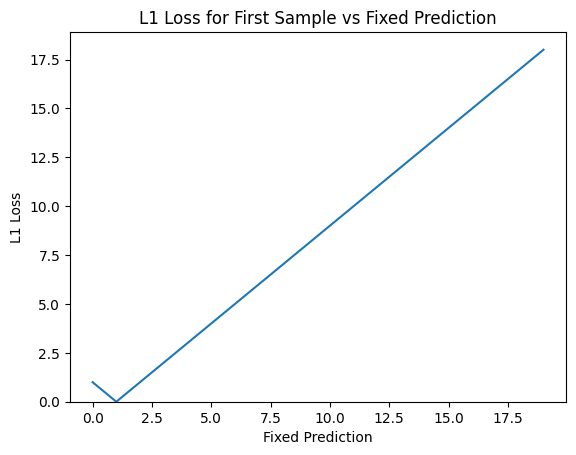

In [ ]:
plt.plot(xs, [abs(x - 1) for x in xs])
plt.gca().set_ylim(0)
plt.title("L1 Loss for First Sample vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss")
None

Script:
* With the L1 loss and one data point, the loss is going down if the prediction is too low, and going up if the prediction is too high.
* Let's jump to all of them at once.

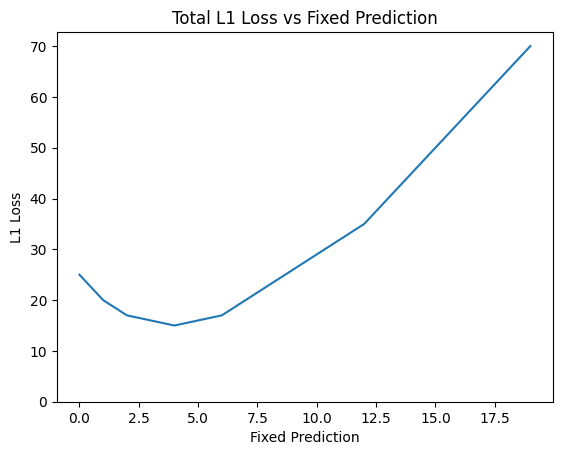

In [ ]:
plt.plot(xs, [sum(abs(x - v) for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.title("Total L1 Loss vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss")
None

Script:
* Again, there is a clean minimum in the loss function.
* With this data, it is at 4. Any guesses why it is at 4?
* Here is the data again -

In [ ]:
data

[1, 2, 4, 6, 12]

Script:
* The minimum is at 4, because the L1 loss is optimized at the median of the data set.
* When the prediction is lower than all the data, in this case, when the prediction is below 1, then the loss for each data point is decreasing as you increase the prediction. So the total loss goes down fast.
* But when your prediction passes 1, then the loss for the 1 data point switches from decreasing to increasing, so the total decreases more slowly.
* Let's look at the loss function calculated from just the first two data points.


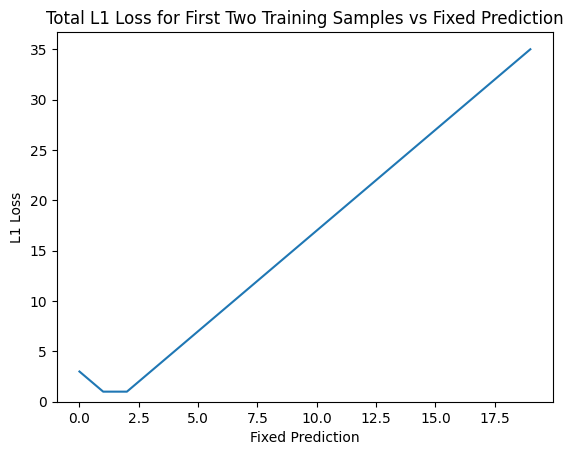

In [ ]:
plt.plot(xs, [sum(abs(x - v) for v in data[:2]) for x in xs])
plt.gca().set_ylim(0)
plt.title("Total L1 Loss for First Two Training Samples vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss")
None

Script:
* See how the loss goes down until the prediction is one.
* Then it is flat until the next data point at two.
* Then it goes up quickly when the prediction is greater than two.
* Why is it flat in the middle?
* Because the increase in the loss function with the one data point is exactly counterbalanced by the decrease in the loss function with the two data point.


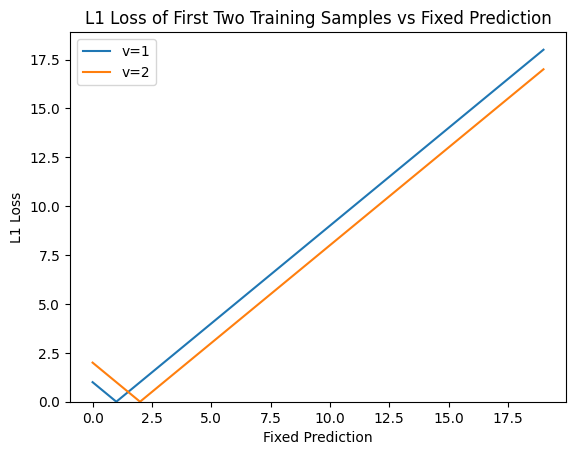

In [ ]:
for v in data[:2]:
    plt.plot(xs, [abs(x - v) for x in xs], label=f"v={v}")

plt.gca().set_ylim(0)
plt.legend()
plt.title("L1 Loss of First Two Training Samples vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss")
None

Script:
* With the full data set, the loss function is increasing if there are more data points below the prediction than above prediction.
* If you remember calculus and derivatives, the slope is exactly the number of data points below the prediction minus the number of data points above the prediction.
* So the slope is zero, which means that it is flat or level, when the same number of data points are above and below the prediction.
* Which is the median.
* One difference with the L2 optimization is that if you have an even number of data points, then the loss function will stop changing once you get to a prediction between the middle points. Any value in that range is equally good.
* There is none of the tie-breaking or interpolation that we talked about for quantiles last week.
* If we look at two distinct x values, then optimizing L1 will draw a line between any pair of acceptable median values for the two x values.
* When we consider the general case with many different inputs, we can say something stronger and less handwavy.
* When optimizing with L1 loss, and your model has an additive constant, like this fixed prediction case or a linear model or almost any other model, the optimized result will have the same number of predictions over and under the target values.
* Or rephrasing, the median residual will be optimized to zero.
* If it is not zero, then you can still optimize with the additive constant to make that happen.


## Image: Linear Models Optimizing L1 vs L2


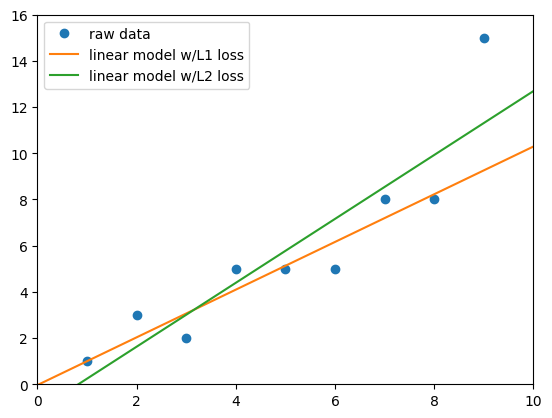

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import sklearn.linear_model

xs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
ys = [1, 3, 2, 5, 5, 5, 8, 8, 15]

xs_test = np.arange(0, 11).reshape(-1, 1)

plt.plot(xs, ys, label="raw data", linestyle="none", marker="o")

def l1_loss(coefficients):
    (m, b) = coefficients
    return sum(abs(m * x + b - y) for (x, y) in zip(xs, ys))

(l1_m, l1_b) = scipy.optimize.minimize(l1_loss, [0, 0]).x
plt.plot(xs_test, xs_test * l1_m + l1_b, label="linear model w/L1 loss")

l2_model = sklearn.linear_model.LinearRegression()
l2_model.fit(xs, ys)
plt.plot(xs_test, l2_model.predict(xs_test), label="linear model w/L2 loss")

plt.gca().set_xlim(0, 10)
plt.gca().set_ylim(0, 16)
plt.legend()

None